In [64]:
import pandas as pd
import numpy as np

In [65]:
data = pd.read_csv("marquis_dataset.csv")
data2 = pd.read_csv("angela_data.csv")

In [66]:
data.head()

,sample,fluid,percentage,time(hrs),start_date,end_date,decalcified
0,bone_marrow,HCl,100%,3.0,05/05/2023,05/05/2023,yes
1,bone_marrow,HCl,100%,3.0,05/05/2023,05/05/2023,yes
2,bone_marrow,HCl,100%,3.0,05/05/2023,05/05/2023,yes
3,bone_marrow,HCl,100%,3.0,05/05/2023,05/05/2023,yes
4,bone_marrow,HCl,100%,3.0,05/05/2023,05/05/2023,yes


In [67]:
data2.head()

,sample,fluid,percentage,time(days),start_date,end_date,decalcified
0,premolar_tooth,nitric_acid,5%,10.0,06/03/2023,16/03/2023,yes
1,premolar_tooth,nitric_acid,5%,7.0,06/03/2023,13/03/2023,yes
2,premolar_tooth,nitric_acid,5%,9.0,06/03/2023,15/03/2023,yes
3,premolar_tooth,nitric_acid,5%,10.0,06/03/2023,16/03/2023,yes
4,premolar_tooth,nitric_acid,5%,10.0,06/03/2023,16/03/2023,yes


In [68]:
data2["time(hrs)"] = data2["time(days)"] * 24
data2 = data2.drop("time(days)", axis=1)

data2.head()

,sample,fluid,percentage,start_date,end_date,decalcified,time(hrs)
0,premolar_tooth,nitric_acid,5%,06/03/2023,16/03/2023,yes,240.0
1,premolar_tooth,nitric_acid,5%,06/03/2023,13/03/2023,yes,168.0
2,premolar_tooth,nitric_acid,5%,06/03/2023,15/03/2023,yes,216.0
3,premolar_tooth,nitric_acid,5%,06/03/2023,16/03/2023,yes,240.0
4,premolar_tooth,nitric_acid,5%,06/03/2023,16/03/2023,yes,240.0


In [69]:
data = data.append(data2).reset_index(drop=True)

# Convert "start date" column to datetime format
data["start_date"] = pd.to_datetime(data["start_date"])

# Extract day, month, and year components
data["day"] = data["start_date"].dt.day
data["month"] = data["start_date"].dt.month
data["year"] = data["start_date"].dt.year

# Print the updated dataframe
data = data.drop(["start_date", "end_date"], axis=1)
data.head()


C:\Users\osink\AppData\Local\Temp\ipykernel_3500\3544510816.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2).reset_index(drop=True)


,sample,fluid,percentage,time(hrs),decalcified,day,month,year
0,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
1,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
2,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
3,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
4,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0


In [70]:
data["sample"].unique()

array(['bone_marrow', 'premolar_tooth', 'molar_tooth', 'incisor_tooth',
       'canine_tooth', nan], dtype=object)

In [71]:
data = data.dropna()
data.head()

,sample,fluid,percentage,time(hrs),decalcified,day,month,year
0,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
1,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
2,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
3,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
4,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0


In [72]:
print("In Marquis dataset there are {} unique row by columns".format(pd.read_csv("marquis_dataset.csv").drop_duplicates().shape))
print("In Angela's dataset there are {} unique row by columns".format(pd.read_csv("angela_data.csv").drop_duplicates().shape))

In Marquis dataset there are (121, 7) unique row by columns
In Angela's dataset there are (526, 7) unique row by columns


In [73]:
data = data[data["decalcified"]=="yes"]

In [74]:
data = data.drop_duplicates().reset_index(drop=True)

In [75]:
data

,sample,fluid,percentage,time(hrs),decalcified,day,month,year
0,bone_marrow,HCl,100%,3.0,yes,5.0,5.0,2023.0
1,bone_marrow,EDTA,12.50%,3.0,yes,5.0,5.0,2023.0
2,bone_marrow,EDTA,20%,7.5,yes,5.0,5.0,2023.0
3,bone_marrow,gooding_and_stewart,10%,6.0,yes,5.0,5.0,2023.0
4,bone_marrow,formic_acid,10%,72.0,yes,5.0,5.0,2023.0
...,...,...,...,...,...,...,...,...
97,canine_tooth,trichloroacetic_acid,5%,144.0,yes,3.0,6.0,2023.0
98,canine_tooth,edta,14%,2184.0,yes,3.0,6.0,2023.0
99,incisor_tooth,edta,14%,2400.0,yes,3.0,6.0,2023.0
100,canine_tooth,edta,14%,2400.0,yes,3.0,6.0,2023.0


In [80]:
data["fluid"].unique()

array(['HCl', 'EDTA', 'gooding_and_stewart', 'formic_acid', 'hammersmith',
       'nitric_acid', 'edta', 'trichloroacetic_acid', 'formalin_nitric'],
      dtype=object)

In [79]:
# Create a dictionary for mapping
mapping = {
    'bone_marrow': 0,
    'premolar_tooth': 1,
    'molar_tooth': 2,
    'incisor_tooth': 3,
    'canine_tooth': 4
}

# Map the values in the "sample" column
data["sample"] = data["sample"].map(mapping)

In [81]:
# Create a dictionary for mapping
mapping = {
    'HCl': 0,
    'EDTA': 1,
    'gooding_and_stewart': 2,
    'formic_acid': 3,
    'hammersmith': 4,
    'nitric_acid': 5,
    'edta': 6,
    'trichloroacetic_acid': 7,
    'formalin_nitric': 8
}

# Map the values in the "fluid" column
data["fluid"] = data["fluid"].map(mapping)

In [83]:
# Remove "%" symbol and convert to float
data["percentage"] = data["percentage"].str.replace("%", "").astype(float)

In [86]:
data = data.drop("decalcified", axis=1)

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("time(hrs)", axis=1),
    data["time(hrs)"],
    test_size=0.2,
    random_state=42
)

# Train and score the model on the training and testing data
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)

# Train the model on the full dataset
model.fit(data.drop("time(hrs)", axis=1), data["time(hrs)"])


Training R^2 score: 0.787135034486016
Testing R^2 score: -14.873540388522716


LinearRegression()

In [91]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("time(hrs)", axis=1),
    data["time(hrs)"],
    test_size=0.2,
    random_state=42
)

# Train the SVR model
model = SVR()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Train the model on the full dataset
model.fit(data.drop("time(hrs)", axis=1), data["time(hrs)"])


R^2 score: -0.2648236686957328


SVR()

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("time(hrs)", axis=1),
    data["time(hrs)"],
    test_size=0.2,
    random_state=42
)

# Train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Train the model on the full dataset
model.fit(data.drop("time(hrs)", axis=1), data["time(hrs)"])


R^2 score: 0.9605536830683215


RandomForestRegressor(random_state=42)

In [97]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("time(hrs)", axis=1),
    data["time(hrs)"],
    test_size=0.2,
    random_state=42
)

# Train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Train the model on the full dataset
model.fit(data.drop("time(hrs)", axis=1), data["time(hrs)"])


R^2 score: 0.9948695408163637


DecisionTreeRegressor(random_state=42)

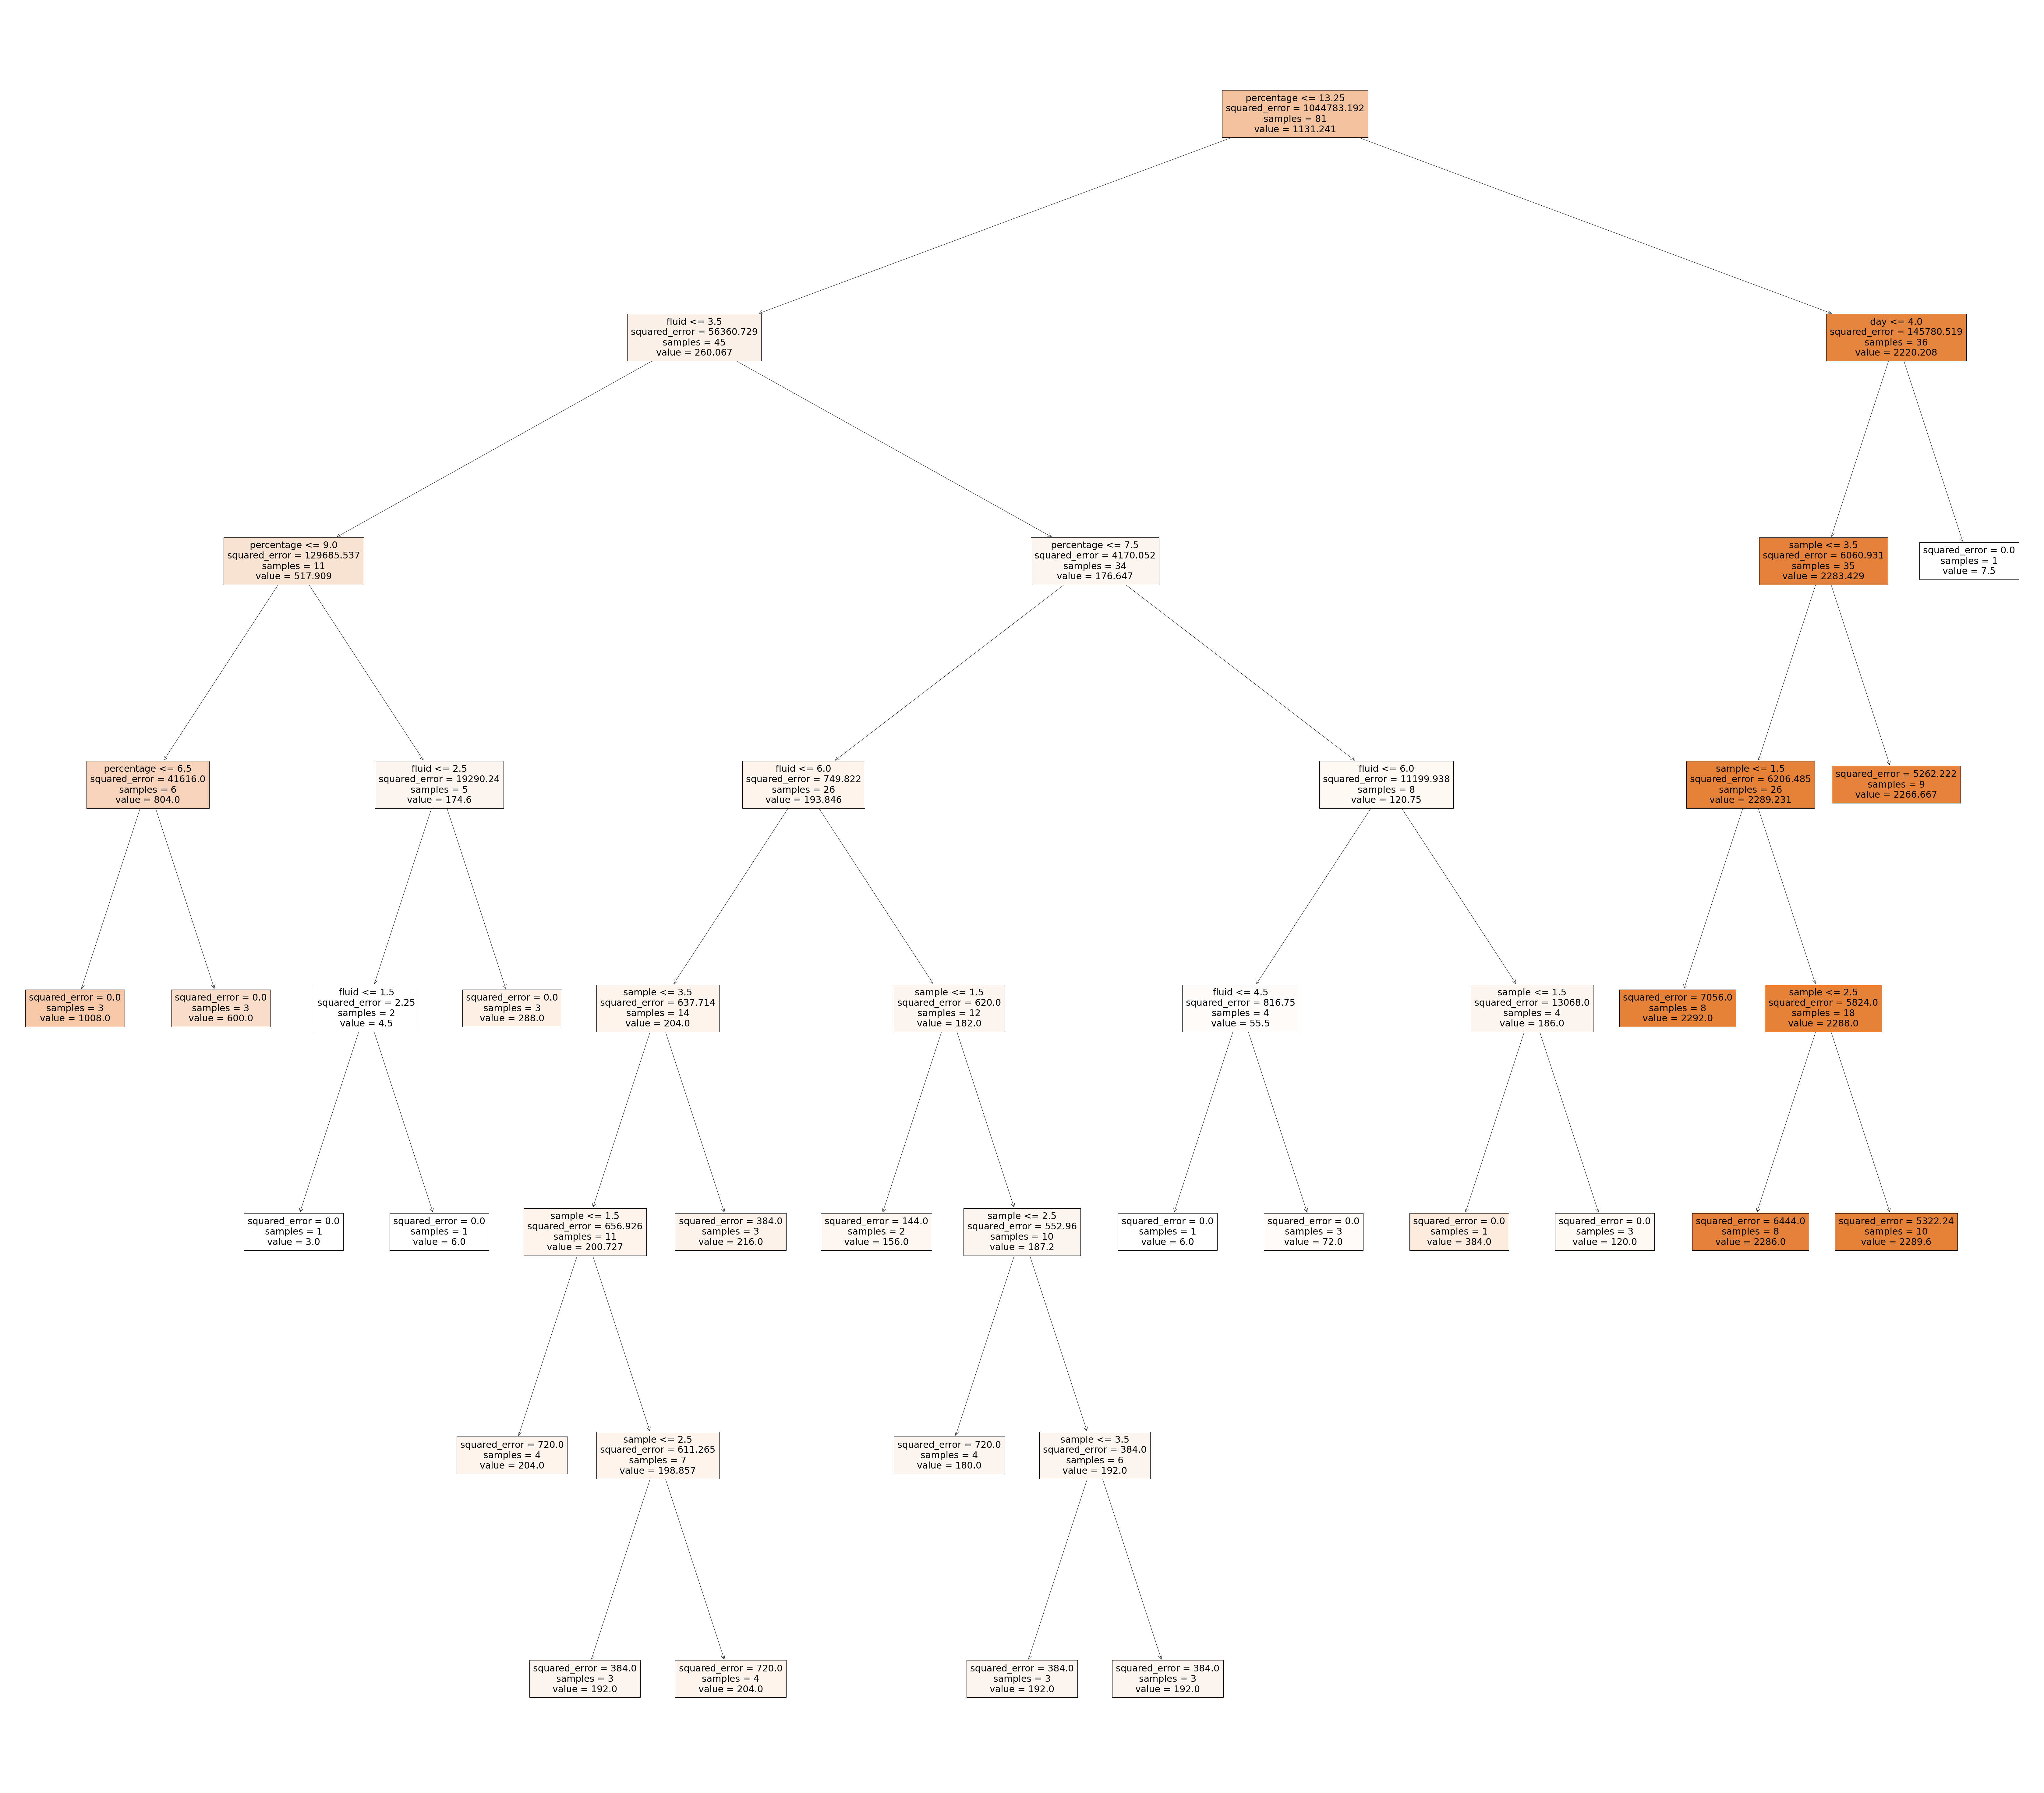

In [101]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import tree
import matplotlib.pyplot as plt

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("time(hrs)", axis=1),
    data["time(hrs)"],
    test_size=0.2,
    random_state=42
)

# Train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(120, 108))
tree.plot_tree(model, feature_names=X_train.columns, filled=True, ax=ax)
# Save the figure as an image file
plt.savefig('Decision Tree.png')
plt.show()

In [100]:
import pickle

# Save the trained model to a file
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [103]:
data.to_csv("Final Dataset.csv", index=False)